# Analysis for Insight Project

## Setup

In [434]:
# import modules
import pandas as pd
import numpy as np
import rootpath
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
import qgrid
import matplotlib.pyplot as plt

# Set root path for project
path = rootpath.detect()

# Read in data
# Use list comprehension to read in all files
df = pd.read_csv(f"{path}/data/data_clean.csv", index_col=0).reset_index(drop=True)

In [414]:
df.head()
df.shape

(413, 209)

In [250]:
#features = df.copy().set_index('product')
# Old, before dimensionality reduction
features = df.copy().drop(['product_type','brand', 'price','size','ratings', 
                           'total_reviews','link','price_oz'],
                          axis=1).set_index('product')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
product,,,,,,,,,,,,,,,,,,,,,
Essential-C Cleanser,1.350766,0.956740,0.496313,-0.346643,-0.121723,0.698171,-0.250083,0.000518,-0.325290,0.319827,...,0.026081,-0.036966,0.112116,0.142322,-0.019743,-0.028321,-0.023661,-0.059696,-0.024449,-0.059284
Squalane Cleanser,1.088917,0.928460,0.410389,-0.281447,-0.450781,0.563821,-0.026953,-0.361596,0.000239,0.143583,...,-0.030961,0.027209,0.080142,0.045868,0.012910,0.019774,0.009014,-0.005920,0.016042,-0.036201
Purity Made Simple One-Step Facial Cleanser,1.227256,0.985289,0.395419,-0.307143,-0.310382,0.596958,-0.369199,-0.176063,-0.120242,0.348068,...,-0.023989,0.058623,0.081051,-0.039511,0.040601,-0.026544,-0.001700,0.026347,0.056097,0.001812
Clearing Skin Wash,0.963208,1.006473,0.403644,-0.333226,-0.311159,0.764733,-0.254830,-0.271517,-0.264316,0.277924,...,0.041221,-0.098966,0.044358,0.078596,0.060703,-0.064776,0.084238,-0.087816,0.035685,0.011756
Checks and Balances Frothy Face Wash,1.673968,1.174699,-0.266279,-0.291725,-0.157588,0.494156,0.046108,0.013967,-0.209965,0.455212,...,0.112197,0.079542,0.024810,-0.018617,0.040109,-0.077685,-0.052836,0.006243,0.045064,0.001661


## K-means++

#### Run K-means and determine number of clusters based on silhouette coef

In [35]:
# Set cluster arguments
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
        }

In [415]:
silhouette_coefficients = []

# Get silhouette coefficient for each cluster out of 50
for cluster in range(2, 30):
    kmeans = KMeans(n_clusters=cluster, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

#### Plot silhouette coefficients vs. clusters

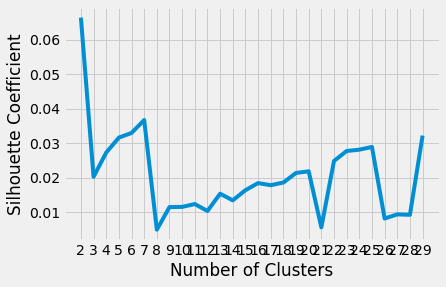

In [416]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Add cluster labels to features


## DBSCAN

In [417]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [435]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

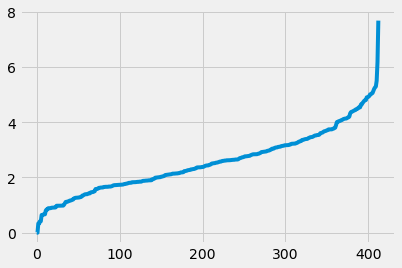

In [436]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [437]:
dbsc = DBSCAN(eps = 5, min_samples = 5).fit(features)
labels = dbsc.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(features, labels))


Estimated number of clusters: 1
Estimated number of noise points: 13
Silhouette Coefficient: 0.335


## Hierarchical/Agglomerative clustering

In [445]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot clustering results

n_clusters = 20

# for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
#     model = AgglomerativeClustering(n_clusters=n_clusters,
#                                     linkage="average", affinity=metric)
#     model.fit(features)
#     plt.figure()
#     plt.axes([0, 0, 1, 1])
#     for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
#         plt.plot(features[model.labels_ == l].T, c=c, alpha=.5)
#     plt.axis('tight')
#     plt.axis('off')
#     plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


# plt.show()

cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  
y_hc =cluster.fit_predict(features)

plt.scatter(features[:,1],features[:,2], c=cluster.labels_, cmap='rainbow')
# plt.scatter(features[y_hc ==0,0], features[y_hc == 0,1], s=100, c='red')
# plt.scatter(features[y_hc==1,0], features[y_hc == 1,1], s=100, c='black')
# plt.scatter(features[y_hc ==2,0], features[y_hc == 2,1], s=100, c='blue')
# plt.scatter(features[y_hc ==3,0], features[y_hc == 3,1], s=100, c='cyan')

TypeError: '(slice(None, None, None), 1)' is an invalid key

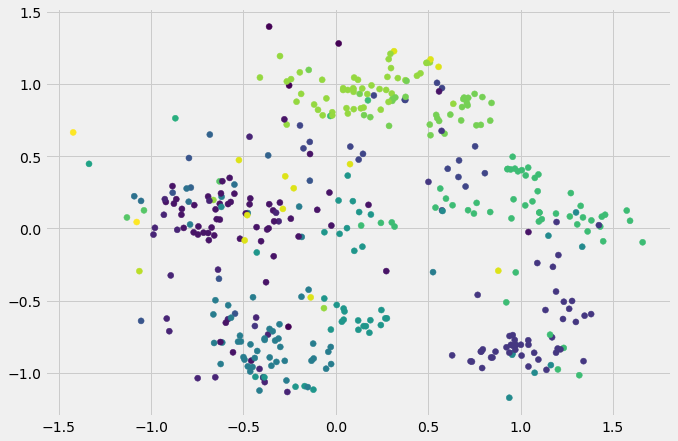

In [441]:
plt.figure(figsize=(10, 7))  
plt.scatter(features['1'], features['2'], c=cluster.labels_) 

## Cosine similarity

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
import heapq as hq

In [389]:
# Calculate cosine similarity for feature 1
res_cosine = cosine_similarity(features.loc['Gentle Skin Cleanser',:].to_frame().transpose(), features) #[0:1] .loc["Essential-C Cleanser",:]
res_cosine = res_cosine.reshape(-1)
res_cosine = pd.DataFrame(res_cosine)
res_sim=df[['product','brand','product_type','price','size','ratings',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_cosine[[0]]
# Round similarity metric
#res_sim['similarity']=round(res_sim['similarity'],2)
# Maybe don't round so you don't have to deal with ties?
#indexNames = res_sim[res_sim['product']=='Essential-C Cleanser'].index
#res_sim.drop(indexNames, inplace=True)
# Sort from top similarity metrics and ignoring self, so starting at 1, not zero
test = res_sim.nlargest(10, 'similarity')[1:10]
#res_sim.head()
# Select top match
test[:1]

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,similarity
111,Foaming Facial Wash,Curél,face wash,20.0,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.0,0.731623


In [358]:
top_sim = res_sim.nlargest(6, 'similarity')[1:6]
#best_sim_score = min(max(top_sim['similarity'] + min(top_sim['price_oz'])))
#best_sim_score
test=top_sim.iloc[0].to_frame().transpose()[['brand','product','price','price_oz','size','link']]

In [359]:
test

,brand,product,price,price_oz,size,link
111,Curél,Foaming Facial Wash,20,4,5,https://www.ulta.com/foaming-facial-wash?produ...


In [370]:
tempdf = df.loc[df['product']==f'{product}']
df.loc[df['product']==f'{product}']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
111,Foaming Facial Wash,Curél,face wash,20.0,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.0,1.305882,...,0.230863,-0.072649,-0.010053,-0.149319,0.050311,0.018858,0.035698,0.076982,-0.042091,0.05028


In [387]:
price_diff = tempdf['price_oz']-output_rec['price_oz']

In [396]:
tempdf = df.loc[df['product']==f'{product}']
test.iloc[1]['price_oz']
#price_diff = tempdf['price_oz']-test['price_oz']
#price_diff=price_diff.astype('float')
#price_diff
#tempdf['price_oz']
#price_diff
#test=price_diff.values[0]
#test
#f"test price:{test}"

3.6

In [328]:
output_rec = top_sim.iloc[0].to_frame().transpose()[['product_type', 'brand','product','price','price_oz','size','link']]
output_rec

,product_type,brand,product,price,price_oz,size,link
111,face wash,Curél,Foaming Facial Wash,20,4,5,https://www.ulta.com/foaming-facial-wash?produ...


In [411]:
tempdf = df.loc[df['product']==f'{product}']
res_sim
#tempdf
price_diff = tempdf['price_oz']-output_rec['price_oz']
#price_diff
#res_sim['price_oz']
#price_diff
#tempdf['price_oz']#-res_sim['price_oz']
top_sim = res_sim.nlargest(6, 'similarity')[1:6]
output_rec = top_sim.iloc[1].to_frame().transpose()[['product_type', 'brand','product', 'similarity','price','price_oz','size','link']]
output_rec['similarity']=output_rec['similarity'].astype(float)
output_rec['similarity']=round(output_rec['similarity'],2)
#output_rec
#tempdf = df.loc[df['product']==f'{product}']
#tempdf
output_rec['similarity']

60    0.73
Name: similarity, dtype: float64

In [284]:
product_input=df.loc[df['product']==f'{product}']
product_input

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
111,Foaming Facial Wash,Curél,face wash,20.0,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.0,1.305882,...,0.230863,-0.072649,-0.010053,-0.149319,0.050311,0.018858,0.035698,0.076982,-0.042091,0.05028


In [282]:
cosine_similarity(product_input) 

ValueError: could not convert string to float: 'Foaming Facial Wash'

In [259]:
top_sim[:1]

NameError: name 'top_sim' is not defined

In [245]:
(((0.881751+0.766394+0.629398)/3) + ((0.629398+0.526911+0.539059)/3) +
((0.881751+0.757364+0.526911)/3) + ((0.766394+0.757364+0.539059)/3))/4

0.6834795

In [219]:
test
#np.minimum(test['similarity'],test['price_oz'])
min(max(test.similarity),min(test.price_oz))

0.785614939701423

In [141]:
features.index
#features.loc["Essential-C Cleanser",:]  #"'Buffet' + Copper Peptides 1%"
features.loc["Essential-C Cleanser",:].to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Essential-C Cleanser,1.692273,-0.334327,-0.1981,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.02647,0.095582,-0.092331,0.176955,-0.006216,-0.021925


In [157]:
features.loc["Essential-C Cleanser",:].to_frame().transpose()
#features.loc[0,["Essential-C Cleanser"]]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Essential-C Cleanser,1.692273,-0.334327,-0.1981,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.02647,0.095582,-0.092331,0.176955,-0.006216,-0.021925


In [191]:
#res_cosine
res_cosine.nlargest(6, 0)[1:6]

,0
66,0.883107
5,0.877325
42,0.873452
29,0.866865
16,0.865999


In [150]:
features.loc["Essential-C Cleanser":]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
product,,,,,,,,,,,,,,,,,,,,,
Essential-C Cleanser,1.692273,-0.334327,-0.198100,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.026470,0.095582,-0.092331,0.176955,-0.006216,-0.021925
Squalane Cleanser,1.838453,-0.752250,-0.164121,-0.689460,-0.311128,0.151342,0.332328,-0.106218,0.363916,0.319669,...,0.212272,-0.010433,0.038155,0.093323,0.041337,0.168622,0.119676,0.056650,-0.019799,0.168964
Purity Made Simple One-Step Facial Cleanser,1.564310,-0.339959,-0.317187,-0.864637,0.188944,0.069568,-0.032678,0.206118,0.212718,0.168260,...,0.133295,-0.026537,0.041422,0.100734,-0.078355,-0.046946,-0.008473,-0.007212,0.088524,0.055125
Brightening Cleanser,1.248828,-0.344294,-0.385217,-0.995253,0.086369,0.310106,0.041395,0.068215,0.149334,-0.177795,...,0.065994,0.031752,0.022277,0.041208,0.012039,-0.063189,-0.020513,0.022545,0.022670,0.007932
Clearing Skin Wash,1.350051,-0.430794,-0.331308,-1.036320,0.214340,0.366983,0.067601,0.027319,0.002637,-0.181765,...,-0.051091,0.071525,-0.009760,0.095336,0.025304,-0.013245,0.066164,-0.105907,-0.008021,0.103390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eudermine Revitalizing Essence,1.837895,0.889976,0.714020,0.132062,0.201420,0.145071,-0.139853,0.036491,-0.158056,0.094124,...,0.136366,0.079923,-0.210101,-0.209674,0.192691,-0.182414,-0.020472,-0.107882,-0.063180,-0.123752
Clear Days Ahead Dark Spot Correcting Serum,2.132511,1.017764,0.791828,0.187813,-0.154457,-0.423460,-0.627530,0.031894,-0.299987,-0.205561,...,-0.197508,0.088492,-0.300584,0.207109,0.094458,-0.072442,0.022628,0.170735,-0.379839,-0.065045
Strawberry Face Milk,1.533950,0.854930,0.455310,-0.306063,-0.493976,-0.458818,0.303550,-0.352652,0.383301,-0.297705,...,-0.148259,0.140489,0.263003,-0.248861,-0.060501,0.046452,0.190982,0.184956,0.297889,-0.172348


In [400]:
#df.loc[df['brand']=='CeraVe']
df.loc[df['brand']=='Kate Somerville'] # INDIE LEE
#df.loc[df['brand']=='Walgreens']
#df.loc[df['product_type']=='toothpaste']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
54,Goat Milk Moisturizing Cleanser,Kate Somerville,face wash,38.0,4.0,4.8,45.0,https://www.ulta.com/goat-milk-moisturizing-cl...,9.50,1.757514,...,0.186446,0.049646,0.003072,0.036815,-0.031136,-0.224117,-0.167057,0.033603,0.059577,-0.097417
185,DermalQuench Liquid Lift Advanced Wrinkle Trea...,Kate Somerville,face serum,95.0,2.5,4.7,296.0,https://www.ulta.com/dermalquench-liquid-lift-...,38.00,1.433841,...,-0.059467,-0.039724,0.055457,0.180643,-0.107246,0.031733,-0.103086,-0.015295,-0.099773,-0.101010
209,DermalQuench Liquid Lift +Retinol,Kate Somerville,face serum,98.0,2.5,4.7,101.0,https://www.ulta.com/dermalquench-liquid-lift-...,39.20,1.782342,...,-0.098642,0.051581,-0.039880,-0.029703,0.138536,0.090540,0.125172,-0.084214,0.013169,-0.044562
247,ExfoliKate Glow Moisturizer,Kate Somerville,face moisturizer,65.0,1.7,4.7,403.0,https://www.ulta.com/exfolikate-glow-moisturiz...,38.24,2.106070,...,0.297729,0.031732,-0.099449,0.105546,0.026454,-0.085472,0.070341,-0.096896,0.087466,-0.294451
349,Age Arrest Anti-Wrinkle Cream,Kate Somerville,face moisturizer,90.0,1.7,4.8,210.0,https://www.ulta.com/age-arrest-anti-wrinkle-c...,52.94,2.183209,...,0.098741,0.033693,0.047204,0.017359,0.034904,0.032207,0.153595,0.021237,0.056621,0.099101
354,Oil Free Moisturizer,Kate Somerville,face moisturizer,65.0,1.7,4.7,576.0,https://www.ulta.com/oil-free-moisturizer?prod...,38.24,1.292138,...,0.115982,0.316987,0.121371,0.065506,0.187991,-0.001140,0.293237,-0.052358,-0.015720,-0.338390
